<a href="https://colab.research.google.com/github/grnascimento/IC/blob/main/notebooks/Resultados_parciais_IC_banco_de_trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parte 1: Estrutura e Inserção dos Bancos.

In [ ]:
!pip install xlrd==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.0 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
%matplotlib inline
%load_ext google.colab.data_table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib as mpl
from matplotlib import rc
import string
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials
import warnings
warnings.filterwarnings("ignore")
import datetime

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
ids=['1mkicloBOnuNK5heS7lJC9RYjbVWqdUfe','1y1wGdg2kwqcj0RHsp_p_pI5NdwUeZNTb']
files = ['AGI01.xlsx','cemeqteste.xls']
sheets = ['Dados','OS']

In [ ]:
for i in range (len(ids)):
  fileDownloaded = drive.CreateFile({'id':ids[i]})
  fileDownloaded.GetContentFile(files[i])
  globals()['df{0}'.format(i)] = pd.read_excel(files[i],sheet_name=sheets[i])

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [ ]:
sns.set(rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'black',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'black',
 'xtick.bottom': False,
 'xtick.color': 'black',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'black',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
 
sns.set_context("notebook", rc={"font.size":14,
                                "axes.titlesize":24,
                                "axes.labelsize":14})

#Parte 2: Ordens de Serviço de Manutenção.

In [ ]:
df0.dropna(subset=['Identificador'],inplace = True)

In [ ]:
df0['Identificador']=df0['Identificador'].apply('{:0>6}'.format)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40230 entries, 0 to 40229
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CODOS          40230 non-null  int64         
 1   NOS            40230 non-null  int64         
 2   NOME           40227 non-null  object        
 3   UNIDADE        40230 non-null  object        
 4   DATAEOS        40230 non-null  datetime64[ns]
 5   SECAO          40230 non-null  object        
 6   DATAFOS        40230 non-null  datetime64[ns]
 7   SITUACAO       40230 non-null  object        
 8   TIPO           40230 non-null  object        
 9   SINT           40227 non-null  object        
 10  CAUSA          40227 non-null  object        
 11  SOLUC          40227 non-null  object        
 12  COMPO          40160 non-null  object        
 13  PI             37251 non-null  object        
 14  Fabricante     36494 non-null  object        
 15  Modelo         3589

In [ ]:
df1['ano'] = pd.DatetimeIndex(df1['DATAEOS']).year

In [ ]:
df1['CustRepa'].sum()

16399925.695

In [ ]:
df1['NOME'] = df1['NOME'].str.upper().str.strip().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.replace('\s+', ' ').str.replace('[{}]'.format(string.punctuation),'')

In [ ]:
df1['NOME']=df1['NOME'].replace(['CONDICIONAR DE AR','CONDICONADOR DE AR'],'CONDICIONADOR DE AR')
df1['NOME']=df1['NOME'].replace(['FANCOIL'],'FAN COIL')
df1['NOME']=df1['NOME'].replace(['SLIT ','SPLIT 18000 BTUH','SPLIT 30000BTUH', 'SPLIT PISO TETO','VRF SPLIT','BISPLIT'],'SPLIT')
df1['NOME']=df1['NOME'].replace(['SPLIT CONDENSADORA'],'UNIDADE CONDENSADORA')

In [ ]:
df2 = df1[((df1.NOME == 'CONDICIONADOR DE AR') | (df1.NOME =='FAN COIL') | (df1.NOME =='SPLIT') | (df1.NOME =='UNIDADE CONDENSADORA')| (df1.NOME =='CHILLER')) & (df1['TIPO']!= 'IE')]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15528 entries, 4 to 40229
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CODOS          15528 non-null  int64         
 1   NOS            15528 non-null  int64         
 2   NOME           15528 non-null  object        
 3   UNIDADE        15528 non-null  object        
 4   DATAEOS        15528 non-null  datetime64[ns]
 5   SECAO          15528 non-null  object        
 6   DATAFOS        15528 non-null  datetime64[ns]
 7   SITUACAO       15528 non-null  object        
 8   TIPO           15528 non-null  object        
 9   SINT           15526 non-null  object        
 10  CAUSA          15526 non-null  object        
 11  SOLUC          15526 non-null  object        
 12  COMPO          15525 non-null  object        
 13  PI             15075 non-null  object        
 14  Fabricante     14806 non-null  object        
 15  Modelo         1466

In [ ]:
df2['CustRepa'].sum()

1856583.883

In [ ]:
dfk = df2[df2['Identificador'].isnull()]

In [ ]:
dfk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1885 entries, 87 to 39899
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CODOS          1885 non-null   int64         
 1   NOS            1885 non-null   int64         
 2   NOME           1885 non-null   object        
 3   UNIDADE        1885 non-null   object        
 4   DATAEOS        1885 non-null   datetime64[ns]
 5   SECAO          1885 non-null   object        
 6   DATAFOS        1885 non-null   datetime64[ns]
 7   SITUACAO       1885 non-null   object        
 8   TIPO           1885 non-null   object        
 9   SINT           1885 non-null   object        
 10  CAUSA          1885 non-null   object        
 11  SOLUC          1885 non-null   object        
 12  COMPO          1885 non-null   object        
 13  PI             1885 non-null   object        
 14  Fabricante     1745 non-null   object        
 15  Modelo         1757

In [ ]:
dfull1 = pd.merge(left=dfk['PI'], right=df0['Identificador'], how='left', left_on=dfk['PI'], right_on=df0['PI Antigo']).drop_duplicates().dropna()

In [ ]:
dkfull1 = pd.DataFrame(dfull1['PI'].value_counts()).reset_index()

In [ ]:
dkfull1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   511 non-null    object
 1   PI      511 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.1+ KB


In [ ]:
val1 = dkfull1[dkfull1['PI'] == 1]

In [ ]:
dup1 = dkfull1[dkfull1['PI'] != 1]

In [ ]:
duplicados1 = pd.merge(left=dup1['index'], right=df0['Identificador'], how='left', left_on=dup1['index'], right_on=df0['PI Antigo']).drop_duplicates().dropna()

In [ ]:
duplicados1['PI'] = duplicados1['index']

In [ ]:
duplicados1[['PI','Identificador']].to_excel('teste.xlsx',sheet_name='duplicados')

In [ ]:
validos1 = pd.merge(left=val1['index'], right=df0['Identificador'], how='left', left_on=val1['index'], right_on=df0['PI Antigo']).drop_duplicates().dropna()

In [ ]:
validos1['PI'] = validos1['index']

In [ ]:
validos1 = validos1[['PI','Identificador']]

In [ ]:
validos1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 388
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PI             389 non-null    object
 1   Identificador  389 non-null    object
dtypes: object(2)
memory usage: 9.1+ KB


In [ ]:
df3 = df2.copy()

In [ ]:
df3.dropna(subset=['Identificador'],inplace = True)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13643 entries, 4 to 40229
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CODOS          13643 non-null  int64         
 1   NOS            13643 non-null  int64         
 2   NOME           13643 non-null  object        
 3   UNIDADE        13643 non-null  object        
 4   DATAEOS        13643 non-null  datetime64[ns]
 5   SECAO          13643 non-null  object        
 6   DATAFOS        13643 non-null  datetime64[ns]
 7   SITUACAO       13643 non-null  object        
 8   TIPO           13643 non-null  object        
 9   SINT           13641 non-null  object        
 10  CAUSA          13641 non-null  object        
 11  SOLUC          13641 non-null  object        
 12  COMPO          13640 non-null  object        
 13  PI             13190 non-null  object        
 14  Fabricante     13061 non-null  object        
 15  Modelo         1291

In [ ]:
df3['Identificador'] = df3['Identificador'].astype('int64')

In [ ]:
df3['Identificador'] = df3['Identificador'].apply('{:0>6}'.format)

In [ ]:
validos2=df3[['PI','Identificador']].drop_duplicates().dropna()

In [ ]:
validos2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4986 entries, 4 to 40202
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PI             4986 non-null   object
 1   Identificador  4986 non-null   object
dtypes: object(2)
memory usage: 116.9+ KB


In [ ]:
dkfull3 = pd.concat([validos1,validos2])

In [ ]:
dkfull3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5375 entries, 0 to 40202
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PI             5375 non-null   object
 1   Identificador  5375 non-null   object
dtypes: object(2)
memory usage: 126.0+ KB


In [ ]:
dkfull4 = pd.DataFrame(dkfull3['PI'].value_counts()).reset_index()

In [ ]:
val2 = dkfull4[dkfull4['PI'] == 1]

In [ ]:
val2['PI'] = val2['index']

In [ ]:
validos = pd.merge(val2['PI'],dkfull3[['PI','Identificador']], how='left',on='PI')

In [ ]:
validos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5279 entries, 0 to 5278
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PI             5279 non-null   object
 1   Identificador  5279 non-null   object
dtypes: object(2)
memory usage: 123.7+ KB


In [ ]:
dup2 = dkfull4[dkfull4['PI'] != 1]

In [ ]:
dup2['PI'] = dup2['index']

In [ ]:
duplicados2 = pd.merge(left=dup2['PI'], right=dkfull3[['PI','Identificador']], how='left', on='PI')

In [ ]:
duplicados = pd.concat([duplicados1,duplicados2]).drop_duplicates().dropna()

In [ ]:
duplicados[['PI','Identificador']].to_excel('teste.xlsx',sheet_name='duplicados')

In [ ]:
duplipi = pd.DataFrame(duplicados['PI'].unique(), columns=['PI'])

In [ ]:
duplipi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   PI      122 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


In [ ]:
notasdupli = pd.merge(duplipi,df2,how='left',on='PI').drop_duplicates()

In [ ]:
notasdupli.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 0 to 429
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PI             430 non-null    object        
 1   CODOS          430 non-null    int64         
 2   NOS            430 non-null    int64         
 3   NOME           430 non-null    object        
 4   UNIDADE        430 non-null    object        
 5   DATAEOS        430 non-null    datetime64[ns]
 6   SECAO          430 non-null    object        
 7   DATAFOS        430 non-null    datetime64[ns]
 8   SITUACAO       430 non-null    object        
 9   TIPO           430 non-null    object        
 10  SINT           430 non-null    object        
 11  CAUSA          430 non-null    object        
 12  SOLUC          430 non-null    object        
 13  COMPO          430 non-null    object        
 14  Fabricante     389 non-null    object        
 15  Modelo         419 non-

In [ ]:
notasok = pd.merge(validos,df2,how='left',on='PI').drop_duplicates()

In [ ]:
notasok.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14115
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   PI               14116 non-null  object        
 1   Identificador_x  14116 non-null  object        
 2   CODOS            14116 non-null  int64         
 3   NOS              14116 non-null  int64         
 4   NOME             14116 non-null  object        
 5   UNIDADE          14116 non-null  object        
 6   DATAEOS          14116 non-null  datetime64[ns]
 7   SECAO            14116 non-null  object        
 8   DATAFOS          14116 non-null  datetime64[ns]
 9   SITUACAO         14116 non-null  object        
 10  TIPO             14116 non-null  object        
 11  SINT             14114 non-null  object        
 12  CAUSA            14114 non-null  object        
 13  SOLUC            14114 non-null  object        
 14  COMPO            14113 non-null  objec

In [ ]:
notasok

PI Identificador_x   CODOS       NOS   NOME UNIDADE    DATAEOS  \
0       07/17977          205300  267270  12381019  SPLIT      IB 2019-10-22   
1       05/14119          674852  248699  10523917  SPLIT     FEC 2017-07-28   
2      01/150195          634932  248535  10507517  SPLIT     PRG 2017-07-24   
3      01/150195          634932  251418  10795817  SPLIT     PRG 2017-12-01   
4       02/44763          678901  248523  10506317  SPLIT     FCM 2017-07-21   
...          ...             ...     ...       ...    ...     ...        ...   
14111   02/38099          542326  242753   9929316  SPLIT     FCM 2016-09-27   
14112   02/38099          542326  245807  10234717  SPLIT     FCM 2017-02-24   
14113   02/38099          542326  250018  10655817  SPLIT     FCM 2017-09-28   
14114   02/38099          542326  277548  13408821  SPLIT     FCM 2021-09-22   
14115  01/129179          545335  278265  13480521  SPLIT   CECOM 2021-10-15   

      SECAO    DATAFOS SITUACAO TIPO  SINT CAUSA SOLUC COMPO      Fabricante  \
0        RF 2021-05-13       FC   MN  INOP  CNID  SREP  OUTR        SPRINGER   
1        RF 2017-08-11       FC   MN  FUNC  INFI  REPA  OUTR           ELGIN   
2        RF 2017-08-22       FC   MN  FUNC  COMD  SUBS  COMP           RHEEN   
3        RF 2017-12-07       FC   MN  FUNC  SUJE  REVI  OUTR           RHEEN   
4        RF 2017-07-27       FC   MN  SDEF  SUJE  REVI  OUTR  SPRINGER MIDEA   
...     ...        ...      ...  ...   ...   ...   ...   ...             ...   
14111    RF 2016-10-31       FC   MN  FUNC  COMD  REPA  OUTR           ELGIN   
14112    RF 2017-03-22       FC   MN  FUNC  DESC  REPA  OUTR           ELGIN   
14113    RF 2017-11-08       FC   MN  FUNC  COMD  SUBS  COMP           ELGIN   
14114    RF 2021-09-27       FC   MN  SDEF  SUJE  LIMP  OUTR           ELGIN   
14115    RF 2021-10-25       FC   MN  FUNC  COMD  SUBS  OUTR           ELGIN   

              Modelo          Serie  Identificador_y  CodCadast  CustRepa  \
0         30.000 BTU  TEC VERIFICAR              NaN     119067      0.00   
1          24000 BTU            NaN         674852.0     111296    140.00   
2      RB1PT36AC2BV2            NaN         634932.0     101105   1106.55   
3      RB1PT36AC2BV2            NaN         634932.0     101105     70.00   
4         42MFQA22M5            NaN         678901.0     111210    140.00   
...              ...            ...              ...        ...       ...   
14111     30.000 BTU              S         542326.0      82261    140.00   
14112     30.000 BTU              S         542326.0      82261     35.00   
14113     30.000 BTU              S         542326.0      82261    780.58   
14114     30.000 BTU              S         542326.0      82261     35.00   
14115      18000 BTU            NaN         545335.0      78429    140.00   

       CustPeca  CustMO  Desconto  CustSE   ano  
0          0.00    0.00         0     0.0  2019  
1         22.68  117.32         0     0.0  2017  
2        966.55  140.00         0     0.0  2017  
3          0.00   70.00         0     0.0  2017  
4          0.00  140.00         0     0.0  2017  
...         ...     ...       ...     ...   ...  
14111     79.02   60.98         0     0.0  2016  
14112      0.00   35.00         0     0.0  2017  
14113    640.58  140.00         0     0.0  2017  
14114      0.00   35.00         0     0.0  2021  
14115      0.00  140.00         0     0.0  2021  

[14116 rows x 26 columns]

In [ ]:
notasok["Identificador"] = notasok["Identificador_x"]

In [ ]:
notasok["Identificador"]=(notasok["Identificador"].astype('int64')).apply('{:0>6}'.format)

In [ ]:
notasok.drop(["Identificador_x","Identificador_y"],axis=1)

PI   CODOS       NOS   NOME UNIDADE    DATAEOS SECAO    DATAFOS  \
0       07/17977  267270  12381019  SPLIT      IB 2019-10-22    RF 2021-05-13   
1       05/14119  248699  10523917  SPLIT     FEC 2017-07-28    RF 2017-08-11   
2      01/150195  248535  10507517  SPLIT     PRG 2017-07-24    RF 2017-08-22   
3      01/150195  251418  10795817  SPLIT     PRG 2017-12-01    RF 2017-12-07   
4       02/44763  248523  10506317  SPLIT     FCM 2017-07-21    RF 2017-07-27   
...          ...     ...       ...    ...     ...        ...   ...        ...   
14111   02/38099  242753   9929316  SPLIT     FCM 2016-09-27    RF 2016-10-31   
14112   02/38099  245807  10234717  SPLIT     FCM 2017-02-24    RF 2017-03-22   
14113   02/38099  250018  10655817  SPLIT     FCM 2017-09-28    RF 2017-11-08   
14114   02/38099  277548  13408821  SPLIT     FCM 2021-09-22    RF 2021-09-27   
14115  01/129179  278265  13480521  SPLIT   CECOM 2021-10-15    RF 2021-10-25   

      SITUACAO TIPO  SINT CAUSA SOLUC COMPO      Fabricante         Modelo  \
0           FC   MN  INOP  CNID  SREP  OUTR        SPRINGER     30.000 BTU   
1           FC   MN  FUNC  INFI  REPA  OUTR           ELGIN      24000 BTU   
2           FC   MN  FUNC  COMD  SUBS  COMP           RHEEN  RB1PT36AC2BV2   
3           FC   MN  FUNC  SUJE  REVI  OUTR           RHEEN  RB1PT36AC2BV2   
4           FC   MN  SDEF  SUJE  REVI  OUTR  SPRINGER MIDEA     42MFQA22M5   
...        ...  ...   ...   ...   ...   ...             ...            ...   
14111       FC   MN  FUNC  COMD  REPA  OUTR           ELGIN     30.000 BTU   
14112       FC   MN  FUNC  DESC  REPA  OUTR           ELGIN     30.000 BTU   
14113       FC   MN  FUNC  COMD  SUBS  COMP           ELGIN     30.000 BTU   
14114       FC   MN  SDEF  SUJE  LIMP  OUTR           ELGIN     30.000 BTU   
14115       FC   MN  FUNC  COMD  SUBS  OUTR           ELGIN      18000 BTU   

               Serie  CodCadast  CustRepa  CustPeca  CustMO  Desconto  CustSE  \
0      TEC VERIFICAR     119067      0.00      0.00    0.00         0     0.0   
1                NaN     111296    140.00     22.68  117.32         0     0.0   
2                NaN     101105   1106.55    966.55  140.00         0     0.0   
3                NaN     101105     70.00      0.00   70.00         0     0.0   
4                NaN     111210    140.00      0.00  140.00         0     0.0   
...              ...        ...       ...       ...     ...       ...     ...   
14111              S      82261    140.00     79.02   60.98         0     0.0   
14112              S      82261     35.00      0.00   35.00         0     0.0   
14113              S      82261    780.58    640.58  140.00         0     0.0   
14114              S      82261     35.00      0.00   35.00         0     0.0   
14115            NaN      78429    140.00      0.00  140.00         0     0.0   

        ano Identificador  
0      2019        205300  
1      2017        674852  
2      2017        634932  
3      2017        634932  
4      2017        678901  
...     ...           ...  
14111  2016        542326  
14112  2017        542326  
14113  2017        542326  
14114  2021        542326  
14115  2021        545335  

[14116 rows x 25 columns]

In [ ]:
bancofull1 = pd.merge(notasok,df0,how='left',on='Identificador').drop_duplicates()

In [ ]:
bancofull1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14115
Data columns (total 85 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   PI                        14116 non-null  object        
 1   Identificador_x           14116 non-null  object        
 2   CODOS                     14116 non-null  int64         
 3   NOS                       14116 non-null  int64         
 4   NOME                      14116 non-null  object        
 5   UNIDADE                   14116 non-null  object        
 6   DATAEOS                   14116 non-null  datetime64[ns]
 7   SECAO                     14116 non-null  object        
 8   DATAFOS                   14116 non-null  datetime64[ns]
 9   SITUACAO                  14116 non-null  object        
 10  TIPO                      14116 non-null  object        
 11  SINT                      14114 non-null  object        
 12  CAUSA             

In [ ]:
bancofull1

PI Identificador_x   CODOS       NOS   NOME UNIDADE    DATAEOS  \
0       07/17977          205300  267270  12381019  SPLIT      IB 2019-10-22   
1       05/14119          674852  248699  10523917  SPLIT     FEC 2017-07-28   
2      01/150195          634932  248535  10507517  SPLIT     PRG 2017-07-24   
3      01/150195          634932  251418  10795817  SPLIT     PRG 2017-12-01   
4       02/44763          678901  248523  10506317  SPLIT     FCM 2017-07-21   
...          ...             ...     ...       ...    ...     ...        ...   
14111   02/38099          542326  242753   9929316  SPLIT     FCM 2016-09-27   
14112   02/38099          542326  245807  10234717  SPLIT     FCM 2017-02-24   
14113   02/38099          542326  250018  10655817  SPLIT     FCM 2017-09-28   
14114   02/38099          542326  277548  13408821  SPLIT     FCM 2021-09-22   
14115  01/129179          545335  278265  13480521  SPLIT   CECOM 2021-10-15   

      SECAO    DATAFOS SITUACAO TIPO  SINT CAUSA SOLUC COMPO      Fabricante  \
0        RF 2021-05-13       FC   MN  INOP  CNID  SREP  OUTR        SPRINGER   
1        RF 2017-08-11       FC   MN  FUNC  INFI  REPA  OUTR           ELGIN   
2        RF 2017-08-22       FC   MN  FUNC  COMD  SUBS  COMP           RHEEN   
3        RF 2017-12-07       FC   MN  FUNC  SUJE  REVI  OUTR           RHEEN   
4        RF 2017-07-27       FC   MN  SDEF  SUJE  REVI  OUTR  SPRINGER MIDEA   
...     ...        ...      ...  ...   ...   ...   ...   ...             ...   
14111    RF 2016-10-31       FC   MN  FUNC  COMD  REPA  OUTR           ELGIN   
14112    RF 2017-03-22       FC   MN  FUNC  DESC  REPA  OUTR           ELGIN   
14113    RF 2017-11-08       FC   MN  FUNC  COMD  SUBS  COMP           ELGIN   
14114    RF 2021-09-27       FC   MN  SDEF  SUJE  LIMP  OUTR           ELGIN   
14115    RF 2021-10-25       FC   MN  FUNC  COMD  SUBS  OUTR           ELGIN   

            Modelo_x          Serie  Identificador_y  CodCadast  CustRepa  \
0         30.000 BTU  TEC VERIFICAR              NaN     119067      0.00   
1          24000 BTU            NaN         674852.0     111296    140.00   
2      RB1PT36AC2BV2            NaN         634932.0     101105   1106.55   
3      RB1PT36AC2BV2            NaN         634932.0     101105     70.00   
4         42MFQA22M5            NaN         678901.0     111210    140.00   
...              ...            ...              ...        ...       ...   
14111     30.000 BTU              S         542326.0      82261    140.00   
14112     30.000 BTU              S         542326.0      82261     35.00   
14113     30.000 BTU              S         542326.0      82261    780.58   
14114     30.000 BTU              S         542326.0      82261     35.00   
14115      18000 BTU            NaN         545335.0      78429    140.00   

       CustPeca  CustMO  Desconto  CustSE   ano Identificador  \
0          0.00    0.00         0     0.0  2019        205300   
1         22.68  117.32         0     0.0  2017        674852   
2        966.55  140.00         0     0.0  2017        634932   
3          0.00   70.00         0     0.0  2017        634932   
4          0.00  140.00         0     0.0  2017        678901   
...         ...     ...       ...     ...   ...           ...   
14111     79.02   60.98         0     0.0  2016        542326   
14112      0.00   35.00         0     0.0  2017        542326   
14113    640.58  140.00         0     0.0  2017        542326   
14114      0.00   35.00         0     0.0  2021        542326   
14115      0.00  140.00         0     0.0  2021        545335   

      Área de Patrimônio     Tipo  PI Antigo  \
0                     IB  PROPRIO   07/17977   
1                    FEC  PROPRIO   05/14119   
2                   DLIE  PROPRIO  01/150195   
3                   DLIE  PROPRIO  01/150195   
4                    FCM  PROPRIO   02/44763   
...                  ...      ...        ...   
14111                FCM  PROPRIO   02/38099   
14

In [ ]:
bancofull1.to_excel('/content/drive/MyDrive/IC/bancofull1.xlsx')

In [ ]:
model = bancofull1[(bancofull1.TIPO == 'MN')]

In [ ]:
model

PI Identificador_x   CODOS       NOS   NOME UNIDADE    DATAEOS  \
0       07/17977          205300  267270  12381019  SPLIT      IB 2019-10-22   
1       05/14119          674852  248699  10523917  SPLIT     FEC 2017-07-28   
2      01/150195          634932  248535  10507517  SPLIT     PRG 2017-07-24   
3      01/150195          634932  251418  10795817  SPLIT     PRG 2017-12-01   
4       02/44763          678901  248523  10506317  SPLIT     FCM 2017-07-21   
...          ...             ...     ...       ...    ...     ...        ...   
14111   02/38099          542326  242753   9929316  SPLIT     FCM 2016-09-27   
14112   02/38099          542326  245807  10234717  SPLIT     FCM 2017-02-24   
14113   02/38099          542326  250018  10655817  SPLIT     FCM 2017-09-28   
14114   02/38099          542326  277548  13408821  SPLIT     FCM 2021-09-22   
14115  01/129179          545335  278265  13480521  SPLIT   CECOM 2021-10-15   

      SECAO    DATAFOS SITUACAO TIPO  SINT CAUSA SOLUC COMPO      Fabricante  \
0        RF 2021-05-13       FC   MN  INOP  CNID  SREP  OUTR        SPRINGER   
1        RF 2017-08-11       FC   MN  FUNC  INFI  REPA  OUTR           ELGIN   
2        RF 2017-08-22       FC   MN  FUNC  COMD  SUBS  COMP           RHEEN   
3        RF 2017-12-07       FC   MN  FUNC  SUJE  REVI  OUTR           RHEEN   
4        RF 2017-07-27       FC   MN  SDEF  SUJE  REVI  OUTR  SPRINGER MIDEA   
...     ...        ...      ...  ...   ...   ...   ...   ...             ...   
14111    RF 2016-10-31       FC   MN  FUNC  COMD  REPA  OUTR           ELGIN   
14112    RF 2017-03-22       FC   MN  FUNC  DESC  REPA  OUTR           ELGIN   
14113    RF 2017-11-08       FC   MN  FUNC  COMD  SUBS  COMP           ELGIN   
14114    RF 2021-09-27       FC   MN  SDEF  SUJE  LIMP  OUTR           ELGIN   
14115    RF 2021-10-25       FC   MN  FUNC  COMD  SUBS  OUTR           ELGIN   

            Modelo_x          Serie  Identificador_y  CodCadast  CustRepa  \
0         30.000 BTU  TEC VERIFICAR              NaN     119067      0.00   
1          24000 BTU            NaN         674852.0     111296    140.00   
2      RB1PT36AC2BV2            NaN         634932.0     101105   1106.55   
3      RB1PT36AC2BV2            NaN         634932.0     101105     70.00   
4         42MFQA22M5            NaN         678901.0     111210    140.00   
...              ...            ...              ...        ...       ...   
14111     30.000 BTU              S         542326.0      82261    140.00   
14112     30.000 BTU              S         542326.0      82261     35.00   
14113     30.000 BTU              S         542326.0      82261    780.58   
14114     30.000 BTU              S         542326.0      82261     35.00   
14115      18000 BTU            NaN         545335.0      78429    140.00   

       CustPeca  CustMO  Desconto  CustSE   ano Identificador  \
0          0.00    0.00         0     0.0  2019        205300   
1         22.68  117.32         0     0.0  2017        674852   
2        966.55  140.00         0     0.0  2017        634932   
3          0.00   70.00         0     0.0  2017        634932   
4          0.00  140.00         0     0.0  2017        678901   
...         ...     ...       ...     ...   ...           ...   
14111     79.02   60.98         0     0.0  2016        542326   
14112      0.00   35.00         0     0.0  2017        542326   
14113    640.58  140.00         0     0.0  2017        542326   
14114      0.00   35.00         0     0.0  2021        542326   
14115      0.00  140.00         0     0.0  2021        545335   

      Área de Patrimônio     Tipo  PI Antigo  \
0                     IB  PROPRIO   07/17977   
1                    FEC  PROPRIO   05/14119   
2                   DLIE  PROPRIO  01/150195   
3                   DLIE  PROPRIO  01/150195   
4                    FCM  PROPRIO   02/44763   
...                  ...      ...        ...   
14111                FCM  PROPRIO   02/38099   
14

In [ ]:
modelo1 = model[['Descrição','Marca','Modelo_y','Série']]

In [ ]:
modelo1

Descrição             Marca  \
0                         CONDICIONADOR DE AR 30.000 BTU          SPRINGER   
1                    UNIDADE EVAPORADORA ELGIN 24000 BTU             ELGIN   
2      CONDICIONADOR DE AR; DO TIPO SPLIT PISO TETO; ...               NaN   
3      CONDICIONADOR DE AR; DO TIPO SPLIT PISO TETO; ...               NaN   
4                      EVAPORADORA WI WALL QF 22000 BTUS  SPRINGER CARRIER   
...                                                  ...               ...   
14111  CONDICIONADOR DE AR; TIPO SPLIT - PISO/TETO; C...             ELGIN   
14112  CONDICIONADOR DE AR; TIPO SPLIT - PISO/TETO; C...             ELGIN   
14113  CONDICIONADOR DE AR; TIPO SPLIT - PISO/TETO; C...             ELGIN   
14114  CONDICIONADOR DE AR; TIPO SPLIT - PISO/TETO; C...             ELGIN   
14115  TIPO SPLIT. PISO/TETO; 18000 BTU/H. VAZAO DE A...      ELGIN SILENT   

            Modelo_y Série  
0       FRIO-CARRIER   NaN  
1                NaN   NaN  
2      RB1PT36AC2BV2   NaN  
3      RB1PT36AC2BV2   NaN  
4         42MFQA22M5   NaN  
...              ...   ...  
14111     PHE30000-2   NaN  
14112     PHE30000-2   NaN  
14113     PHE30000-2   NaN  
14114     PHE30000-2   NaN  
14115   PHF 18.000-2   NaN  

[10289 rows x 4 columns]

In [ ]:
modelo1a = pd.DataFrame(modelo1.groupby(['Descrição','Marca','Modelo_y','Série'],dropna=False).size().reset_index(name='total'))

In [ ]:
modelo1a

Descrição              Marca  \
0     ##CONDICIONADOR DE AR. SPLIT - HI WALL; 18.000...           SPRINGER   
1     ##CONDICIONADOR DE AR. SPLIT/HI-WALL; 30000 BT...              ELGIN   
2     ##CONDICIONADOR DE AR. TIPO JANELA; COM CAPACI...  SPRINGER SILENTIA   
3     ##CONDICIONADOR DE AR. TIPO SPLIT - PISO/TETO;...              ELGIN   
4     ##CONDICIONADOR DE AR; SPLIT - HI WALL; 18.000...              MIDEA   
...                                                 ...                ...   
3650                  VENTILADOR DE CONDICIONADOR DE AR            HITACHI   
3651                  VENTILADOR DE CONDICIONADOR DE AR            HITACHI   
3652  evaporadora  DE AR  condicionado ; TIPO SPLIT ...              ELGIN   
3653  unidade evaporadaora  SPRINGER CARRIER AIR SPL...                NaN   
3654  unidade evaporadora e condensadora de AR,  PIS...   carrier totaline   

                       Modelo_y          Série  total  
0          42LUCE18S5/42KCE18S5       S/ACESSO     21  
1                  SRF-30.000-2            NaN     29  
2                      ZCB185RB            NaN      4  
3                    PHF30000-2            NaN      2  
4                         ELITE            NaN      2  
...                         ...            ...    ...  
3650                  RVT150B8P  RVT0911689866      1  
3651                  RVT150B8P  RVT0911689869      1  
3652                  PISO TETO            NaN      2  
3653                        NaN            NaN      2  
3654  42xqb036515lc/xbc036515mc            NaN      1  

[3655 rows x 5 columns]

In [ ]:
modelo1a.to_excel('/content/drive/MyDrive/IC/modelo1a.xlsx')

In [ ]:
modelo2 = bancofull1[['NOME',	'Fabricante',	'Modelo_x',	'Serie','Descrição','Marca','Modelo_y','Série']].drop_duplicates()

In [ ]:
modelo2.to_excel('/content/drive/MyDrive/IC/modelo2a.xlsx')

In [ ]:
modelo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5281 entries, 0 to 14110
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NOME        5281 non-null   object
 1   Fabricante  5067 non-null   object
 2   Modelo_x    5067 non-null   object
 3   Serie       3197 non-null   object
 4   Descrição   5281 non-null   object
 5   Marca       4571 non-null   object
 6   Modelo_y    4292 non-null   object
 7   Série       2221 non-null   object
dtypes: object(8)
memory usage: 371.3+ KB


In [ ]:
bancofull1.to_excel('/content/drive/MyDrive/IC/bancofull.xlsx')

In [ ]:
situacao = bancofull1.groupby(bancofull1['Status Bem']).count()

In [ ]:
situacao

PI  Identificador_x  CODOS    NOS   NOME  UNIDADE  DATAEOS  \
Status Bem                                                                  
ATIVO       13444            13444  13444  13444  13444    13444    13444   
BAIXADO       672              672    672    672    672      672      672   

            SECAO  DATAFOS  SITUACAO   TIPO   SINT  CAUSA  SOLUC  COMPO  \
Status Bem                                                                
ATIVO       13444    13444     13444  13444  13442  13442  13442  13441   
BAIXADO       672      672       672    672    672    672    672    672   

            Fabricante  Modelo_x  Serie  Identificador_y  CodCadast  CustRepa  \
Status Bem                                                                      
ATIVO            12841     12697   7867            12448      13444     13444   
BAIXADO            639       644    411              656        672       672   

            CustPeca  CustMO  Desconto  CustSE    ano  Identificador  \
Status Bem                                                             
ATIVO          13444   13444     13444   13444  13444          13444   
BAIXADO          672     672       672     672    672            672   

            Área de Patrimônio   Tipo  PI Antigo  Descrição  Marca  Modelo_y  \
Status Bem                                                                     
ATIVO                    13444  13444      13395      13444  11514     11010   
BAIXADO                    672    672        669        672    546       528   

            Série  Situação  Data Situação  Conta Contábil  \
Status Bem                                                   
ATIVO        5380     13444          13444           13444   
BAIXADO       236       672            672             672   

            Conta SIAFEM - Próprio  Conta SIAFEM - Terceiro  Grupo  \
Status Bem                                                           
ATIVO                        13203                    13444  13444   
BAIXADO                        672                      672    672   

            Modalidade  Processo  NE    AF  Convênio  Termo  Auxílio  \
Status Bem                                                             
ATIVO            13444     13435  88  7399      4108   3623     1769   
BAIXADO            672       671  23   245       245    305       10   

            Doc. Fornec.  Fornecedor  Doc. Cedente  Cedente  \
Status Bem                                                    
ATIVO               7794        7794          4548     4548   
BAIXADO              316         316           298      298   

            Doc. Benef./Cess.  Beneficiário/Cessionário  Órgão Fabric.  \
Status Bem                                                               
ATIVO                       2                         2          13444   
BAIXADO                   535                       535            672   

            Tipo Doc. Fiscal  Doc. Fiscal  Data Doc. Fiscal  \
Status Bem                                                    
ATIVO                  13443        10444             13417   
BAIXADO                  669          345               654   

            Data Incorporação  Vig. Garantia  Moeda Aquisição  \
Status Bem                                                      
ATIVO                   13444           5804            13444   
BAIXADO                   672            333              672   

            Valor Aquisição  Valor Corrigido (R$)  Órgão  Desc. Órgão  Imóvel  \
Status Bem                                                                      
ATIVO                 13444                 13444  13444        13444   13340   
BAIXADO                 672                   672    672          672     672   

            Complemento Endereço  Sit. Contab.  Fim de Cessão  \
Status Bem                                                      
ATIVO                      11680         13444             49   
BAIXADO                      362           672              3   

 

In [ ]:
bancobaixado = bancofull1[bancofull1['Status Bem'] == 'BAIXADO']

In [ ]:
bancobaixado

PI Identificador_x   CODOS       NOS                 NOME  \
28      01/29173          023820  248851  10539117  CONDICIONADOR DE AR   
38      01/87646          081511  248778  10531817                SPLIT   
39     01/97419B          696360  248777  10531717                SPLIT   
40     01/97419B          696360  249441  10598117                SPLIT   
41     01/97419B          696360  254367  11090718                SPLIT   
...          ...             ...     ...       ...                  ...   
14000   03/15829          144523  237522   9406216  CONDICIONADOR DE AR   
14008   18/07747          504526  237083   9362316                SPLIT   
14009   18/07747          504526  244108  10064816                SPLIT   
14022   01/88086          081982  237135   9367516                SPLIT   
14072   27/13070          388693  237322   9386216  CONDICIONADOR DE AR   

      UNIDADE    DATAEOS SECAO    DATAFOS SITUACAO TIPO  SINT CAUSA SOLUC  \
28      DEDIC 2017-08-04    RF 2017-08-18       FC   MN  INOP  DESG  DESA   
38         GR 2017-08-01    RF 2017-08-07       FC   MP  FUNC  SUJE  PREV   
39         GR 2017-08-01    RF 2017-08-07       FC   MP  FUNC  SUJE  PREV   
40         GR 2017-09-01    RF 2017-09-26       FC   MP  FUNC  SUJE  PREV   
41         GR 2018-04-20    RF 2018-04-25       FC   MN  FUNC  COMD  REPA   
...       ...        ...   ...        ...      ...  ...   ...   ...   ...   
14000     FEM 2016-02-22    RF 2016-06-30       FC   MN  INOP  COMD  DESA   
14008     FEQ 2016-02-03    RF 2016-07-12       FC   MN  FUNC  SUJE  REVI   
14009     FEQ 2016-11-29    RF 2017-12-14       FC   MN  FUNC  SUJE  SCON   
14022    HEMO 2016-02-05    RF 2017-08-10       FC   MN  FUNC  NECE  FECH   
14072   CAISM 2016-02-15    RF 2016-06-30       FC   MN  SOLD  NECE  FECH   

      COMPO Fabricante     Modelo_x         Serie  Identificador_y  CodCadast  \
28     OUTR     CONSUL   21.000 BTU           NaN          23820.0      12900   
38     OUTR   SPRINGER    30000 BTU           NaN          81511.0      42766   
39     OUTR    CARRIER    9.000 BTU           NaN         696360.0      52299   
40     OUTR    CARRIER    9.000 BTU           NaN         696360.0      52299   
41     OUTR    CARRIER    9.000 BTU           NaN         696360.0      52299   
...     ...        ...          ...           ...              ...        ...   
14000  OUTR     CONSUL  18.000 BTUS  SU.MG0176260         144523.0      47795   
14008  OUTR      ELGIN   60.000 BTU           NaN         504526.0      97121   
14009  OUTR      ELGIN   60.000 BTU           NaN         504526.0      97121   
14022  OUTR       GREE   30.000 BTU           NaN          81982.0      42009   
14072  OUTR   SPRINGER     7500 BTU    NAO CONSTA         388693.0      34992   

       CustRepa  CustPeca  CustMO  Desconto  CustSE   ano Identificador  \
28         35.0      0.00   35.00         0    0.00  2017        023820   
38         70.0      0.00   70.00         0    0.00  2017        081511   
39         70.0      0.00   70.00         0    0.00  2017        696360   
40         70.0      0.00   70.00         0    0.00  2017        696360   
41         35.0      0.00   35.00         0    0.00  2018        696360   
...         ...       ...     ...       ...     ...   ...           ...   
14000     112.0      0.00   52.01         0   59.99  2016        144523   
14008     112.0     49.82   62.18         0    0.00  2016        504526   
14009     330.0      0.00   70.00         0  260.00  2016        504526   
14022      28.0      0.00    0.00         0    0.00  2016        081982   
14072     112.0      0.00   52.01         0   59.99  2016        388693   

      Área de Patrimônio     Tipo PI Antigo  \
28      BENS DISPONÍVEIS  PROPRIO  01/29173   
38      BENS DISPONÍVEIS  PROPRIO  01/87646   
39      BENS DISPONÍVEIS  PROPRIO  01/97419   
40      BENS DISPONÍVEIS  PROPRIO  01/97419   
41      BENS DISPONÍVEIS  PROPRIO  01/97419   
...                  ...      ..

In [ ]:
bancobaixado['Tempo'] = pd.to_datetime(bancobaixado['Data Situação']) - pd.to_datetime(bancobaixado['DATAEOS'])

In [ ]:
bancobaixado

PI Identificador_x   CODOS       NOS                 NOME  \
28      01/29173          023820  248851  10539117  CONDICIONADOR DE AR   
38      01/87646          081511  248778  10531817                SPLIT   
39     01/97419B          696360  248777  10531717                SPLIT   
40     01/97419B          696360  249441  10598117                SPLIT   
41     01/97419B          696360  254367  11090718                SPLIT   
...          ...             ...     ...       ...                  ...   
14000   03/15829          144523  237522   9406216  CONDICIONADOR DE AR   
14008   18/07747          504526  237083   9362316                SPLIT   
14009   18/07747          504526  244108  10064816                SPLIT   
14022   01/88086          081982  237135   9367516                SPLIT   
14072   27/13070          388693  237322   9386216  CONDICIONADOR DE AR   

      UNIDADE    DATAEOS SECAO    DATAFOS SITUACAO TIPO  SINT CAUSA SOLUC  \
28      DEDIC 2017-08-04    RF 2017-08-18       FC   MN  INOP  DESG  DESA   
38         GR 2017-08-01    RF 2017-08-07       FC   MP  FUNC  SUJE  PREV   
39         GR 2017-08-01    RF 2017-08-07       FC   MP  FUNC  SUJE  PREV   
40         GR 2017-09-01    RF 2017-09-26       FC   MP  FUNC  SUJE  PREV   
41         GR 2018-04-20    RF 2018-04-25       FC   MN  FUNC  COMD  REPA   
...       ...        ...   ...        ...      ...  ...   ...   ...   ...   
14000     FEM 2016-02-22    RF 2016-06-30       FC   MN  INOP  COMD  DESA   
14008     FEQ 2016-02-03    RF 2016-07-12       FC   MN  FUNC  SUJE  REVI   
14009     FEQ 2016-11-29    RF 2017-12-14       FC   MN  FUNC  SUJE  SCON   
14022    HEMO 2016-02-05    RF 2017-08-10       FC   MN  FUNC  NECE  FECH   
14072   CAISM 2016-02-15    RF 2016-06-30       FC   MN  SOLD  NECE  FECH   

      COMPO Fabricante     Modelo_x         Serie  Identificador_y  CodCadast  \
28     OUTR     CONSUL   21.000 BTU           NaN          23820.0      12900   
38     OUTR   SPRINGER    30000 BTU           NaN          81511.0      42766   
39     OUTR    CARRIER    9.000 BTU           NaN         696360.0      52299   
40     OUTR    CARRIER    9.000 BTU           NaN         696360.0      52299   
41     OUTR    CARRIER    9.000 BTU           NaN         696360.0      52299   
...     ...        ...          ...           ...              ...        ...   
14000  OUTR     CONSUL  18.000 BTUS  SU.MG0176260         144523.0      47795   
14008  OUTR      ELGIN   60.000 BTU           NaN         504526.0      97121   
14009  OUTR      ELGIN   60.000 BTU           NaN         504526.0      97121   
14022  OUTR       GREE   30.000 BTU           NaN          81982.0      42009   
14072  OUTR   SPRINGER     7500 BTU    NAO CONSTA         388693.0      34992   

       CustRepa  CustPeca  CustMO  Desconto  CustSE   ano Identificador  \
28         35.0      0.00   35.00         0    0.00  2017        023820   
38         70.0      0.00   70.00         0    0.00  2017        081511   
39         70.0      0.00   70.00         0    0.00  2017        696360   
40         70.0      0.00   70.00         0    0.00  2017        696360   
41         35.0      0.00   35.00         0    0.00  2018        696360   
...         ...       ...     ...       ...     ...   ...           ...   
14000     112.0      0.00   52.01         0   59.99  2016        144523   
14008     112.0     49.82   62.18         0    0.00  2016        504526   
14009     330.0      0.00   70.00         0  260.00  2016        504526   
14022      28.0      0.00    0.00         0    0.00  2016        081982   
14072     112.0      0.00   52.01         0   59.99  2016        388693   

      Área de Patrimônio     Tipo PI Antigo  \
28      BENS DISPONÍVEIS  PROPRIO  01/29173   
38      BENS DISPONÍVEIS  PROPRIO  01/87646   
39      BENS DISPONÍVEIS  PROPRIO  01/97419   
40      BENS DISPONÍVEIS  PROPRIO  01/97419   
41      BENS DISPONÍVEIS  PROPRIO  01/97419   
...                  ...      ..

In [ ]:
bancobaixado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 28 to 14072
Data columns (total 86 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   PI                        672 non-null    object         
 1   Identificador_x           672 non-null    object         
 2   CODOS                     672 non-null    int64          
 3   NOS                       672 non-null    int64          
 4   NOME                      672 non-null    object         
 5   UNIDADE                   672 non-null    object         
 6   DATAEOS                   672 non-null    datetime64[ns] 
 7   SECAO                     672 non-null    object         
 8   DATAFOS                   672 non-null    datetime64[ns] 
 9   SITUACAO                  672 non-null    object         
 10  TIPO                      672 non-null    object         
 11  SINT                      672 non-null    object         
 12  CAUSA

In [ ]:
baixadoestranho = (bancobaixado[bancobaixado['Tempo'] < pd.Timedelta(0)]).reset_index()

In [ ]:
baixadoestranho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 87 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   index                     51 non-null     int64          
 1   PI                        51 non-null     object         
 2   Identificador_x           51 non-null     object         
 3   CODOS                     51 non-null     int64          
 4   NOS                       51 non-null     int64          
 5   NOME                      51 non-null     object         
 6   UNIDADE                   51 non-null     object         
 7   DATAEOS                   51 non-null     datetime64[ns] 
 8   SECAO                     51 non-null     object         
 9   DATAFOS                   51 non-null     datetime64[ns] 
 10  SITUACAO                  51 non-null     object         
 11  TIPO                      51 non-null     object         
 12  SINT      

In [ ]:
baixadoestranho

index            PI Identificador_x   CODOS       NOS  \
0      45  01/97420B             688895  248775  10531517   
1    2232      16/04218          523493  243169   9970916   
2    2233      16/04218          523493  251671  10821117   
3    2234      16/04218          523493  252664  10920418   
4    2235      16/04218          523493  266489  12302919   
5    2265      18/08308          534422  273638  13017821   
6    2943      24/00810          369144  265702  12224219   
7    2944      24/00810          369144  267135  12367519   
8    4123      29/09785          406291  268833  12537320   
9    4172      29/15559          446056  266488  12302819   
10   4173      29/15559          446056  268274  12481419   
11   5632     02/25145A          688869  253991  11053118   
12   5633     02/25145A          688869  254917  11145718   
13   5634     02/25145A          688869  259096  11563618   
14   5635     02/25145A          688869  272252  12879220   
15   5636     02/25145D          688870  253989  11052918   
16   5637     02/25145D          688870  259097  11563718   
17   5638     02/25145D          688870  264767  12130719   
18   5639     02/25145D          688870  265948  12248819   
19   5640     02/25145D          688870  267004  12354419   
20   5657      02/14792          113656  253878  11041818   
21   5658      02/14792          113656  262138  11867819   
22   5811      36/07435          616103  256245  11278518   
23   5838      03/21641          564935  255638  11217818   
24   5839      03/21641          564935  256774  11331418   
25   5840      03/21641          564935  259007  11554718   
26   5856      26/02966          372948  256071  11261118   
27   5862      26/03234          373218  256079  11261918   
28   5867      26/02970          372952  256066  11260618   
29   5868      26/02629          372611  256063  11260318   
30   6632      01/90621          084556  234603   9114315   
31   6715      33/02457          424593  234454   9099415   
32   7114      33/01798          423926  235567   9210715   
33   7115      33/01797          423925  235566   9210615   
34   7401      19/04307          342389  236010   9255016   
35   7503      18/03815          336304  235924   9246416   
36   8231      27/18510          566137  244338  10087816   
37   9706      32/02406          416406  230465   8700515   
38   9730      18/02449          334919  230903   8744315   
39   9979      27/15960          445986  239376   9591616   
40   9980      27/15960          445986  246679  10321917   
41  10010      32/05512          445326  239544   9608416   
42  10100      06/16984          181807  259965  11650518   
43  10498      10/08801          250060  239252   9579216   
44  11337      01/55582          048743  242566   9910616   
45  11338      01/55582          048743  244528  10106817   
46  11614      06/25876          578413  241290   9783016   
47  12040  01/121804             526786  261229  11776919   
48  12877      19/05987          344085  236074   9261416   
49  12930      19/01120          339673  236100   9264016   
50  13137     01/125445          533206  261230  11777019   

                   NOME UNIDADE    DATAEOS SECAO    DATAFOS SITUACAO TIPO  \
0                 SPLIT      GR 2017-08-01    RF 2017-08-07       FC   MP   
1               CHILLER      BC 2016-10-17    RF 2016-11-07       FC   MN   
2               CHILLER      BC 2017-12-19    RF 2018-01-25       FC   MN   
3               CHILLER      BC 2018-02-16    RF 2018-03-07       FC   MN   
4               CHILLER      BC 2019-09-24    RF 2019-10-03       FC   MN   
5                 SPLIT     FEQ 2021-01-22    RF 2021-10-13       FC   MN   
6                 SPLIT     CLE 2019-08-22    RF 2019-09-23       FC   MN   
7                 SPLIT     CLE 2019-10-15    RF 2021-08-10       FC   MN   
8                 SPLIT     FEE 2020-01-13    RF 2020-02-17       FC   MN   
9                 SPLIT     FEE 2019-09-23    RF 2019-10-15  

In [ ]:
equipamentoestranhos = pd.DataFrame(baixadoestranho['Identificador_x'].unique(),columns=['Identificador'])
equipamentoestranhos

Identificador
0         688895
1         523493
2         534422
3         369144
4         406291
5         446056
6         688869
7         688870
8         113656
9         616103
10        564935
11        372948
12        373218
13        372952
14        372611
15        084556
16        424593
17        423926
18        423925
19        342389
20        336304
21        566137
22        416406
23        334919
24        445986
25        445326
26        181807
27        250060
28        048743
29        578413
30        526786
31        344085
32        339673
33        533206

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15528 entries, 4 to 40229
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CODOS          15528 non-null  int64         
 1   NOS            15528 non-null  int64         
 2   NOME           15528 non-null  object        
 3   UNIDADE        15528 non-null  object        
 4   DATAEOS        15528 non-null  datetime64[ns]
 5   SECAO          15528 non-null  object        
 6   DATAFOS        15528 non-null  datetime64[ns]
 7   SITUACAO       15528 non-null  object        
 8   TIPO           15528 non-null  object        
 9   SINT           15526 non-null  object        
 10  CAUSA          15526 non-null  object        
 11  SOLUC          15526 non-null  object        
 12  COMPO          15525 non-null  object        
 13  PI             15075 non-null  object        
 14  Fabricante     14806 non-null  object        
 15  Modelo         1466

In [ ]:
rankmanutencao1 = pd.DataFrame((bancofull1.groupby(bancofull1['Identificador']))[['CustRepa','CustPeca','CustMO','Desconto','CustSE']].describe()).sort_values(('CustRepa', 'count'),ascending=False)
rankmanutencao1

CustRepa                                                    \
                 count         mean          std     min     25%     50%   
Identificador                                                              
089919            43.0  1727.156977  7497.170617    0.00   10.00   10.00   
089918            43.0   853.667209  2864.564772    0.00   10.00   10.00   
089907            39.0    42.499744    76.545082   10.00   10.00   10.00   
089897            38.0    83.252368   197.061019   10.00   10.00   10.00   
089916            38.0    32.212895    40.406208   10.00   10.00   10.00   
...                ...          ...          ...     ...     ...     ...   
505961             1.0    59.990000          NaN   59.99   59.99   59.99   
506173             1.0    35.000000          NaN   35.00   35.00   35.00   
506314             1.0   112.000000          NaN  112.00  112.00  112.00   
506730             1.0    35.000000          NaN   35.00   35.00   35.00   
713411             1.0     0.000000          NaN    0.00    0.00    0.00   

                                 CustPeca                                     \
                   75%       max    count        mean          std  min  25%   
Identificador                                                                  
089919         108.500  48610.00     43.0  137.265116   440.505864  0.0  0.0   
089918         185.075  17960.00     43.0  572.376047  2752.218075  0.0  0.0   
089907          27.940    380.00     39.0   17.606154    43.988432  0.0  0.0   
089897          70.075    898.08     38.0   54.427368   180.693555  0.0  0.0   
089916          29.335    140.00     38.0    6.808947    22.130629  0.0  0.0   
...                ...       ...      ...         ...          ...  ...  ...   
505961          59.990     59.99      1.0    0.000000          NaN  0.0  0.0   
506173          35.000     35.00      1.0    0.000000          NaN  0.0  0.0   
506314         112.000    112.00      1.0    0.000000          NaN  0.0  0.0   
506730          35.000     35.00      1.0    0.000000          NaN  0.0  0.0   
713411           0.000      0.00      1.0    0.000000          NaN  0.0  0.0   

                                     CustMO                               \
               50%     75%       max  count       mean        std    min   
Identificador                                                              
089919         0.0   0.000   2198.80   43.0  38.263953  57.977936   0.00   
089918         0.0   0.000  17950.00   43.0  32.496512  41.739875   0.00   
089907         0.0   0.000    197.00   39.0  24.893590  40.265380  10.00   
089897         0.0  11.775    838.53   38.0  28.825000  42.746474  10.00   
089916         0.0   0.000    113.20   38.0  25.403947  36.855606  10.00   
...            ...     ...       ...    ...        ...        ...    ...   
505961         0.0   0.000      0.00    1.0   0.000000        NaN   0.00   
506173         0.0   0.000      0.00    1.0  35.000000        NaN  35.00   
506314         0.0   0.000      0.00    1.0  52.010000        NaN  52.01   
506730         0.0   0.000      0.00    1.0  35.000000        NaN  35.00   
713411         0.0   0.000      0.00    1.0   0.000000        NaN   0.00   

                                           Desconto                           \
                 25%    50%    75%     max    count mean  std  min  25%  50%   
Identificador                                                                  
089919         10.00  10.00  35.00  280.00     43.0  0.0  0.0  0.0  0.0  0.0   
089918         10.00  10.00  35.00  140.00     43.0  0.0  0.0  0.0  0.0  0.0   
089907         10.00  10.00  10.00  183.00     39.0  0.0  0.0  0.0  0.0  0.0   
089897         10.00  10.00  10.00  140.00     38.0  0.0  0.0  0.0  0.0  0.0   
089916         10.00  10.00  10.00  140.00     38.0  0.0  0.0  0.0  0.0  0.0   
...              ...    ...    ...     ...      ...  ...  ...  ...  ...  ...   
505961          0.00   0.00   0.00    0.00 

In [ ]:
totais1 = (bancofull1.groupby(bancofull1['NOME']))[['CustRepa','CustPeca','CustMO','Desconto','CustSE']].describe()
totais1

CustRepa                                                \
                        count        mean          std   min   25%      50%   
NOME                                                                          
CHILLER                 298.0  535.995604  3101.229368   0.0  25.0  122.725   
CONDICIONADOR DE AR    3730.0   85.942133   120.558702   0.0  35.0   56.000   
FAN COIL               1403.0  114.695375   336.494554   0.0  10.0   10.350   
SPLIT                  8684.0  123.408428   235.242220   0.0  35.0   70.000   
UNIDADE CONDENSADORA      1.0   35.000000          NaN  35.0  35.0   35.000   

                                       CustPeca                                \
                         75%       max    count        mean          std  min   
NOME                                                                            
CHILLER               162.02  48610.00    298.0  187.456074  1303.157699  0.0   
CONDICIONADOR DE AR   112.00   1435.00   3730.0   17.706245    86.017533  0.0   
FAN COIL              140.00   7556.77   1403.0   25.190214   234.349316  0.0   
SPLIT                 125.00   6396.38   8684.0   28.023630   142.988189  0.0   
UNIDADE CONDENSADORA   35.00     35.00      1.0    0.000000          NaN  0.0   

                                               CustMO                        \
                      25%  50%  75%       max   count       mean        std   
NOME                                                                          
CHILLER               0.0  0.0  0.0  17950.00   298.0  50.110503  49.195508   
CONDICIONADOR DE AR   0.0  0.0  0.0    978.25  3730.0  41.886566  33.428313   
FAN COIL              0.0  0.0  0.0   7546.77  1403.0  34.571924  41.947861   
SPLIT                 0.0  0.0  0.0   4266.93  8684.0  48.035592  47.241259   
UNIDADE CONDENSADORA  0.0  0.0  0.0      0.00     1.0  35.000000        NaN   

                                                       Desconto            \
                        min    25%   50%   75%     max    count mean  std   
NOME                                                                        
CHILLER                0.00  10.00  35.0  84.0   280.0    298.0  0.0  0.0   
CONDICIONADOR DE AR    0.00  28.00  35.0  70.0   192.5   3730.0  0.0  0.0   
FAN COIL               0.00  10.00  10.0  35.0   200.0   1403.0  0.0  0.0   
SPLIT                -59.99   5.77  35.0  70.0  1015.0   8684.0  0.0  0.0   
UNIDADE CONDENSADORA  35.00  35.00  35.0  35.0    35.0      1.0  0.0  NaN   

                                               CustSE              \
                      min  25%  50%  75%  max   count        mean   
NOME                                                                
CHILLER               0.0  0.0  0.0  0.0  0.0   298.0  351.147248   
CONDICIONADOR DE AR   0.0  0.0  0.0  0.0  0.0  3730.0   49.747952   
FAN COIL              0.0  0.0  0.0  0.0  0.0  1403.0   83.342359   
SPLIT                 0.0  0.0  0.0  0.0  0.0  8684.0   78.840344   
UNIDADE CONDENSADORA  0.0  0.0  0.0  0.0  0.0     1.0    0.000000   

                                                                    
                              std  min  25%  50%     75%       max  
NOME                                                                
CHILLER               2917.749049  0.0  0.0  0.0  127.02  48600.00  
CONDICIONADOR DE AR    114.872581  0.0  0.0  0.0   59.99   1400.00  
FAN COIL               233.518811  0.0  0.0  0.0  128.47   4199.00  
SPLIT                  199.394919  0.0  0.0  0.0   61.43   6361.38  
UNIDADE CONDENSADORA          NaN  0.0  0.0  0.0    0.00      0.00

In [ ]:
rankmanutencao2 = pd.DataFrame(bancofull1[['Identificador','Data Incorporação','TIPO']].value_counts()).reset_index()
rankmanutencao2

Identificador Data Incorporação TIPO   0
0           089914        17/11/2004   MP  33
1           089919        17/11/2004   MP  33
2           089894        17/11/2004   MP  33
3           089905        17/11/2004   MP  32
4           089916        17/11/2004   MP  32
...            ...               ...  ...  ..
5649        507772        15/10/2009   MN   1
5650        507991        20/10/2009   MN   1
5651        507992        20/10/2009   MN   1
5652        508004        20/10/2009   RE   1
5653        713411        07/03/2007   MN   1

[5654 rows x 4 columns]

#Parte 3: Ordens de Serviço de Compra.

In [ ]:
df4 = df1[((df1.NOME == 'CONDICIONADOR DE AR') | (df1.NOME =='FAN COIL') | (df1.NOME =='SPLIT') | (df1.NOME =='UNIDADE CONDENSADORA')| (df1.NOME =='CHILLER')) & (df1['TIPO']== 'IE')]

In [ ]:
df4

CODOS       NOS   NOME UNIDADE    DATAEOS SECAO    DATAFOS SITUACAO  \
3120   237524   9406416  SPLIT     PRG 2016-02-22    IN 2016-07-29       FC   
3156   237561   9410116  SPLIT    PREF 2016-02-23    IN 2016-06-01       FC   
3157   237562   9410216  SPLIT    PREF 2016-02-23    IN 2016-06-01       FC   
3493   237912   9445216  SPLIT     FEE 2016-03-04    IN 2016-06-01       FC   
3494   237913   9445316  SPLIT     FEE 2016-03-04    IN 2016-06-01       FC   
...       ...       ...    ...     ...        ...   ...        ...      ...   
38368  275176  13171621  SPLIT    FENF 2021-05-19    IN 2021-10-13       FC   
38369  275177  13171721  SPLIT    FENF 2021-05-19    IN 2021-10-13       FC   
38589  275427  13196721  SPLIT     FEC 2021-06-01    IN 2021-10-20       FC   
39023  276182  13272221  SPLIT     FEE 2021-07-14    IN 2021-10-13       FC   
39024  276183  13272321  SPLIT     FEE 2021-07-14    IN 2021-10-13       FC   

      TIPO  SINT CAUSA SOLUC COMPO         PI Fabricante      Modelo  \
3120    IE  SOLD  NECE  INST  OUTR  01/158200      MIDEA  42VFCA18M5   
3156    IE  SOLD  NECE  INST  OUTR  01/156498    FUJITSU   ABBF18LAT   
3157    IE  SOLD  NECE  INST  OUTR  01/156499    FUJITSU   ABBF18LAT   
3493    IE  SOLD  NECE  INST  OUTR  01/156507      MIDEA  42VFQA18M5   
3494    IE  SOLD  NECE  INST  OUTR  01/156510      MIDEA  42VFQA18M5   
...    ...   ...   ...   ...   ...        ...        ...         ...   
38368   IE  SOLD  NECE  INST  OUTR        NaN    FUJITSU  ABBG24LVTA   
38369   IE  SOLD  NECE  INST  OUTR        NaN    FUJITSU  ABBG24LVTA   
38589   IE  SOLD  NECE  INST  OUTR        NaN      ELGIN  PIFI36B2NA   
39023   IE  SOLD  NECE  INST  OUTR        NaN    FUJITSU  ABBG24LVTA   
39024   IE  SOLD  NECE  INST  OUTR        NaN    FUJITSU  ABBG24LVTA   

               Serie  Identificador  CodCadast  CustRepa  CustPeca  CustMO  \
3120   4715B18363633       663878.0     108004    4576.0    4400.0   176.0   
3156         T001337       660975.0     107508    7394.4    7110.0   284.4   
3157         T001296       660976.0     107507    7394.4    7110.0   284.4   
3493   5015B18569439       660984.0     107518    4576.0    4400.0   176.0   
3494   5015B18569324       660987.0     107519    4576.0    4400.0   176.0   
...              ...            ...        ...       ...       ...     ...   
38368        T000564       778382.0     122456    8778.0    8568.0   210.0   
38369        T000534       778383.0     122458    8778.0    8568.0   210.0   
38589       06842747       778621.0     122545    9910.0    9700.0   210.0   
39023        T000563       778390.0     122460    8778.0    8568.0   210.0   
39024        T000590       778391.0     122462    8778.0    8568.0   210.0   

       Desconto  CustSE   ano  
3120          0     0.0  2016  
3156          0     0.0  2016  
3157          0     0.0  2016  
3493          0     0.0  2016  
3494          0     0.0  2016  
...         ...     ...   ...  
38368         0     0.0  2021  
38369         0     0.0  2021  
38589         0     0.0  2021  
39023         0     0.0  2021  
39024         0     0.0  2021  

[344 rows x 25 columns]

In [ ]:
(df4.groupby(df4['NOME']))[['CustRepa','CustPeca','CustMO','Desconto','CustSE']].describe()

CustRepa                                                \
                       count     mean          std     min     25%     50%   
NOME                                                                         
CONDICIONADOR DE AR      1.0   140.00          NaN   140.0   140.0   140.0   
SPLIT                  343.0  4792.14  2670.177784  2524.0  2732.9  3746.9   

                                     CustPeca                           \
                        75%      max    count        mean          std   
NOME                                                                     
CONDICIONADOR DE AR   140.0    140.0      1.0    32.64000          NaN   
SPLIT                4576.0  12025.0    343.0  4636.58105  2621.610354   

                                                                  CustMO  \
                         min      25%      50%      75%       max  count   
NOME                                                                       
CONDICIONADOR DE AR    32.64    32.64    32.64    32.64     32.64    1.0   
SPLIT                2440.00  2627.90  3606.90  4400.00  11780.00  343.0   

                                                                          \
                          mean        std    min     25%     50%     75%   
NOME                                                                       
CONDICIONADOR DE AR   47.37000        NaN  47.37   47.37   47.37   47.37   
SPLIT                155.55895  58.517004  84.00  105.00  140.00  176.00   

                            Desconto                                     \
                        max    count mean  std  min  25%  50%  75%  max   
NOME                                                                      
CONDICIONADOR DE AR   47.37      1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0   
SPLIT                284.55    343.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                    CustSE                                                 
                     count   mean  std    min    25%    50%    75%    max  
NOME                                                                       
CONDICIONADOR DE AR    1.0  59.99  NaN  59.99  59.99  59.99  59.99  59.99  
SPLIT                343.0   0.00  0.0   0.00   0.00   0.00   0.00   0.00

In [ ]:
(df4.groupby(df4['NOME']))[['CustRepa','CustPeca','CustMO','Desconto','CustSE']].sum()

CustRepa    CustPeca    CustMO  Desconto  CustSE
NOME                                                                   
CONDICIONADOR DE AR      140.00       32.64     47.37         0   59.99
SPLIT                1643704.02  1590347.30  53356.72         0    0.00

In [ ]:
df4['CustRepa'].sum()

1643844.0200000003

In [ ]:
dz0a = pd.DataFrame((bancofull1['ano'].groupby(bancofull1['ano']).count()))
dz0a

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/google/colab/data_table.py", line 181, in _repr_javascript_module_
    return self._gen_js(self._preprocess_dataframe())
  File "/usr/local/lib/python3.7/dist-packages/google/colab/data_table.py", line 157, in _preprocess_dataframe
    dataframe = dataframe.reset_index()
  File "/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py", line 5799, in reset_index
    new_obj.insert(0, name, level_values)
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py", line 4414, in insert
    raise ValueError(f"cannot insert {column}, already exists")
ValueError: cannot insert ano, already exists


ano
ano       
2014     8
2015   935
2016  2238
2017  1985
2018  3275
2019  2776
2020  1703
2021  1196

In [ ]:
dz0b=pd.DataFrame(df1['ano'].groupby(df1['ano']).count())
dz0b

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/google/colab/data_table.py", line 181, in _repr_javascript_module_
    return self._gen_js(self._preprocess_dataframe())
  File "/usr/local/lib/python3.7/dist-packages/google/colab/data_table.py", line 157, in _preprocess_dataframe
    dataframe = dataframe.reset_index()
  File "/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py", line 5799, in reset_index
    new_obj.insert(0, name, level_values)
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py", line 4414, in insert
    raise ValueError(f"cannot insert {column}, already exists")
ValueError: cannot insert ano, already exists


ano
ano       
2013     8
2014    21
2015  1545
2016  8047
2017  6747
2018  8098
2019  7602
2020  4536
2021  3626

In [ ]:
dz0=pd.DataFrame(((bancofull1['ano'].groupby(bancofull1['ano']).count())/(df1['ano'].groupby(df1['ano']).count())*100))

In [ ]:
dz0.rename(columns={'ano': 'percent'}, inplace=True)

In [ ]:
dz0=dz0.reset_index()

In [ ]:
dz0

ano    percent
0  2013        NaN
1  2014  38.095238
2  2015  60.517799
3  2016  27.811607
4  2017  29.420483
5  2018  40.442084
6  2019  36.516706
7  2020  37.544092
8  2021  32.984004

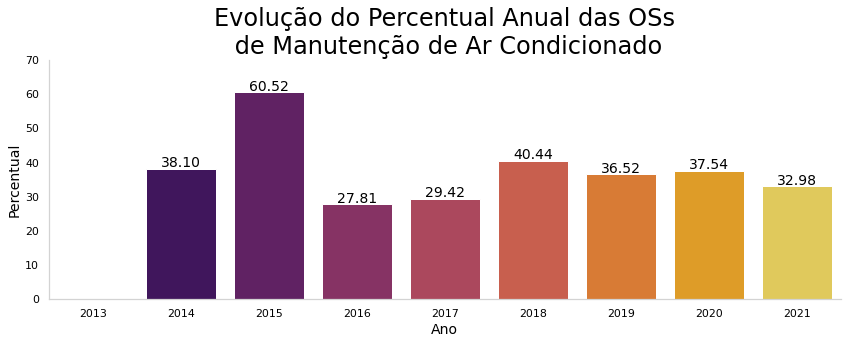

In [ ]:
#Gráfico de evolução eventos na rede
plt.figure(figsize=(12, 5))
plt.title('Evolução do Percentual Anual das OSs'+'\n' +' de Manutenção de Ar Condicionado')
ax1 = sns.barplot(dz0['ano'],dz0['percent'],palette="inferno")
for p in ax1.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate('{:.2f}'.format(height), (x + width/2, y + height+0.5), fontsize=14, ha='center')
plt.xticks(rotation=0)
plt.xlabel('Ano')
plt.ylabel('Percentual')
plt.tight_layout()
plt.ylim([0,70])
plt.savefig('/content/drive/MyDrive/IC/des/g01.svg', format='svg', dpi=1200)
plt.show()

In [ ]:
dz1=pd.DataFrame(((bancofull1['CustRepa'].groupby(bancofull1['ano']).sum())/(df1['CustRepa'].groupby(df1['ano']).sum())*100)).reset_index()

In [ ]:
dz1

ano   CustRepa
0  2013        NaN
1  2014  28.728475
2  2015  27.636993
3  2016   6.396913
4  2017   9.772595
5  2018  14.249173
6  2019   9.706987
7  2020  11.676674
8  2021  10.022262

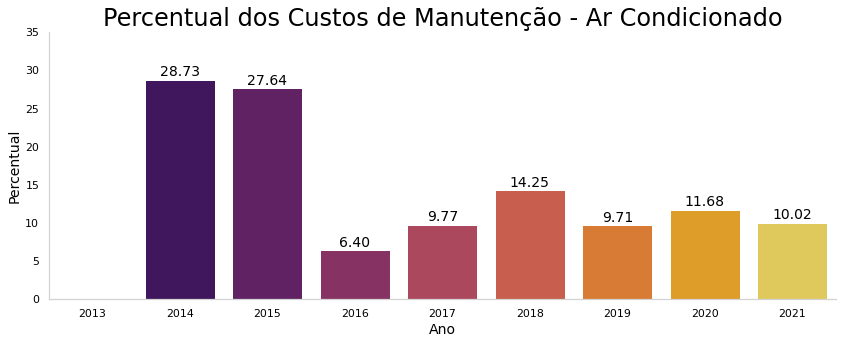

In [ ]:
#Gráfico de evolução eventos na rede
plt.figure(figsize=(12, 5))
plt.title('Percentual dos Custos de Manutenção - Ar Condicionado')
ax1 = sns.barplot(dz1['ano'],dz1['CustRepa'],palette="inferno")
for p in ax1.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate('{:.2f}'.format(height), (x + width/2, y + height+0.5), fontsize=14, ha='center')
plt.xticks(rotation=0)
plt.xlabel('Ano')
plt.ylabel('Percentual')
plt.tight_layout()
plt.ylim([0,35])
plt.savefig('/content/drive/MyDrive/IC/g2.svg', format='svg', dpi=1200)
plt.show()


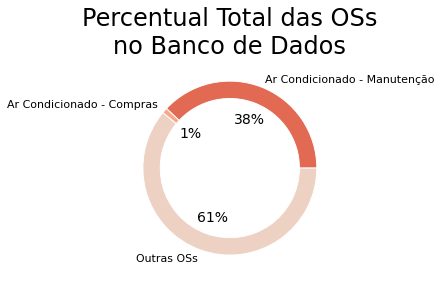

In [ ]:
data = [38, 1, 61]
labels = ['Ar Condicionado - Manutenção', 'Ar Condicionado - Compras', 'Outras OSs']

#define Seaborn color palette to use
colors = sns.color_palette('coolwarm_r')

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%',wedgeprops={'width':0.2})
plt.title('Percentual Total das OSs'+'\n'+ 'no Banco de Dados')
plt.savefig('/content/drive/MyDrive/IC/des/g02.svg', format='svg', dpi=1200)
plt.show()


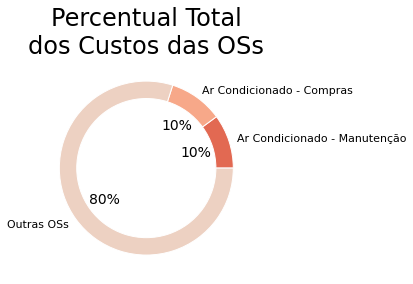

In [ ]:
data = [10.06, 10.03, 79.91]
labels = ['Ar Condicionado - Manutenção', 'Ar Condicionado - Compras', 'Outras OSs']

#define Seaborn color palette to use
colors = sns.color_palette('coolwarm_r')

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%',wedgeprops={'width':0.2})
plt.title('Percentual Total'+'\n'+ 'dos Custos das OSs')
plt.savefig('/content/drive/MyDrive/IC/des/g03.svg', format='svg', dpi=1200)
plt.show()
